# <center> **Generación de Gaussianas Multivariadas** </center>
## <font size=4> **Elements of Machine Learning 2025** </font> <font color=gray size=4> -- Alan Reyes-Figueroa </font>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats as st

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Generar variables aleatorias gaussianas con $\mu, \Sigma$ prescrita

In [3]:
n = 5000

In [4]:
d = 3
mu0 = np.zeros(d)
sig0 = np.eye(d)

In [6]:
sig0

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [5]:
mu0

array([0., 0., 0.])

In [7]:
# Genera una muestra aleatoria de una normal d-dimensional
# con media mu0 y covarianza sig0
Z = np.random.multivariate_normal(mu0, sig0, size=n)

In [8]:
Z.shape

(5000, 3)

In [ ]:
Z[:10]

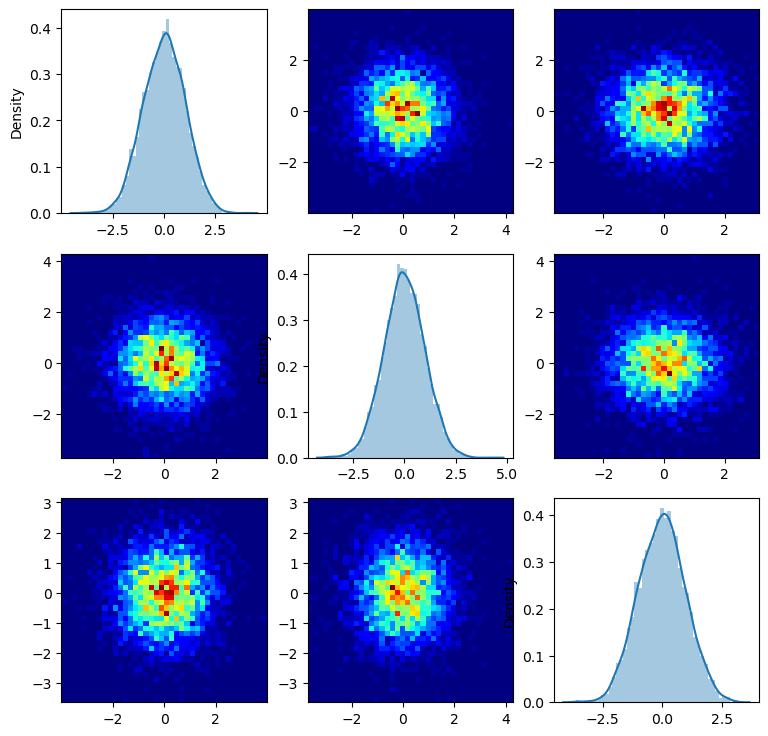

In [9]:
plt.figure(figsize=(9,9))
for i in range(0, d):
    for j in range(0, d):
        plt.subplot(d, d, d*i+j+1)
        if (i==j):
            sns.distplot(Z[:,i], kde=True)
        else:
            plt.hist2d(Z[:,j], Z[:,i], bins=(40,40), cmap=plt.cm.jet)
plt.show()

In [10]:
Z.mean(axis=0)

array([ 0.01772004,  0.00065576, -0.00971176])

In [11]:
CovZ = np.corrcoef(Z.T)

In [12]:
np.round(CovZ, 3)

array([[ 1.   , -0.039,  0.019],
       [-0.039,  1.   , -0.003],
       [ 0.019, -0.003,  1.   ]])

## Convertir a mu y Sigma dada por el usuario

In [13]:
Sig = np.array([[1.0,  0.3,  -0.9],
                [0.3,  1.0,  -0.6], 
                [-0.9, -0.6, 1.0]])

In [14]:
mu = np.array([1, 2, -0.5])

In [15]:
np.linalg.eig(Sig)

(array([2.23392718, 0.03942647, 0.72664636]),
 array([[-0.5928513 , -0.61083416, -0.52479421],
        [-0.46414185, -0.27336893,  0.84252108],
        [ 0.65810309, -0.74306868,  0.12144657]]))

In [16]:
L = np.linalg.cholesky(Sig).T

In [17]:
L

array([[ 1.        ,  0.3       , -0.9       ],
       [ 0.        ,  0.9539392 , -0.345934  ],
       [ 0.        ,  0.        ,  0.26519742]])

In [18]:
# Generación de N(\mu, \Sigma)

X = mu + (Z @ L)

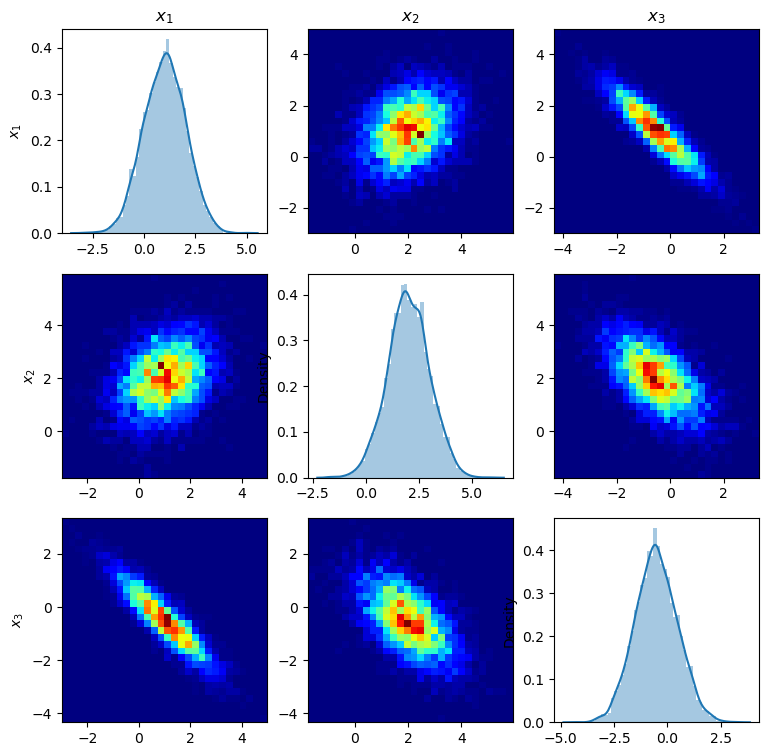

In [19]:
plt.figure(figsize=(9,9))
for i in range(0, d):
    for j in range(0, d):
        plt.subplot(d, d, d*i+j+1)
        if (i==j):
            sns.distplot(X[:,i], kde=True)
        else:
            plt.hist2d(X[:,j], X[:,i], bins=(30,30), cmap=plt.cm.jet)
        if (j==0):
            plt.ylabel(r'$x_{}$'.format(i+1))
        if (i==0):
            plt.title(r'$x_{}$'.format(j+1))
plt.show()

In [20]:
X.mean(axis=0)

array([ 1.01772004,  2.00594157, -0.51875042])

In [21]:
CovX = np.corrcoef(X.T)

In [22]:
np.round(CovX, 4)

array([[ 1.    ,  0.2719, -0.901 ],
       [ 0.2719,  1.    , -0.5785],
       [-0.901 , -0.5785,  1.    ]])